In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set(style="darkgrid")

###  Load and Clean Data

In [13]:
df = pd.read_csv("D:\\IMDb Movies India.csv", encoding='latin1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.head(20)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [16]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [17]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [19]:
df.dropna(subset=["Rating"], inplace = True)
df.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [20]:
df.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)
df.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [21]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

df['Year'] = df['Year'].str.replace('(', '').str.replace(')', '').astype(int)

df['Duration'] = df['Duration'].str.replace('min', '').astype(float)

df['Duration'].fillna(df['Duration'].median(), inplace=True)

df.isnull().sum()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10324\1874094000.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duration'].fillna(df['Duration'].median(), inplace=True)


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int32  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int32  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int32(2), object(6)
memory usage: 590.5+ KB


###  EDA (Exploratory data Analysis)

In [23]:
top_movies = df.sort_values(by='Rating', ascending=False).head(10)
top_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94.0,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79.0,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,135.0,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
14222,The Reluctant Crime,2020,113.0,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105.0,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,2021,93.0,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
12673,Secrets of Sinauli,2021,56.0,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
5125,God of gods,2019,90.0,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8344,Love Sorries,2021,101.0,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
1314,Ashok Vatika,2018,97.0,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi


###  top-rated movies released each year

C:\Users\Dell\AppData\Local\Temp\ipykernel_10324\2846706017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_movies, x="Year", palette="rocket")


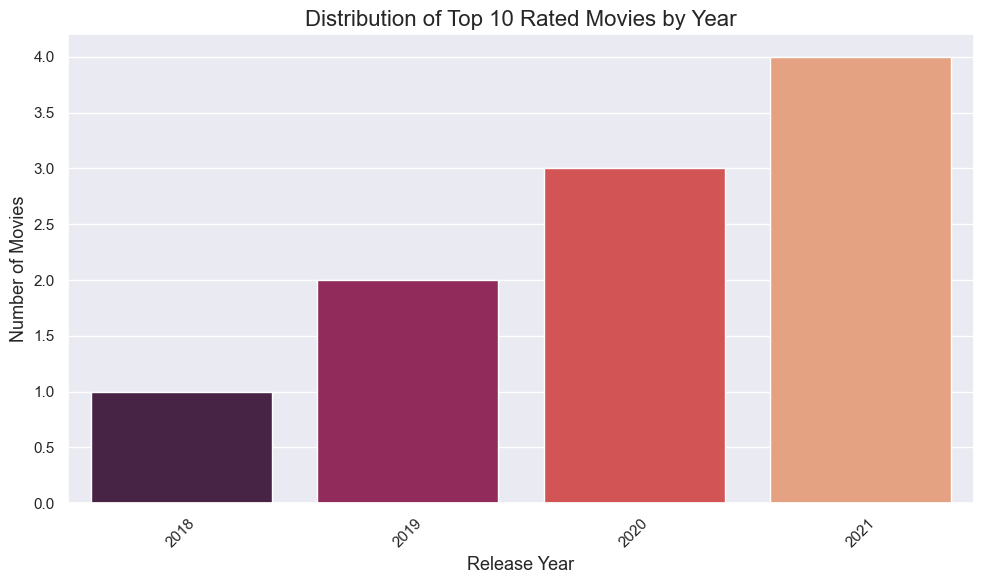

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=top_movies, x="Year", palette="rocket")

plt.title("Distribution of Top 10 Rated Movies by Year", fontsize=16)
plt.xlabel("Release Year", fontsize=13)
plt.ylabel("Number of Movies", fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###  Distribution of Genre of movies

In [26]:
genre_counts = (
    df['Genre']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Genre', 'Genre': 'Count'})
)

top_genres = genre_counts.head(5)
print(top_genres)

                  Count  count
0                 Drama   1137
1        Drama, Romance    443
2  Action, Crime, Drama    417
3                Action    391
4         Drama, Family    291


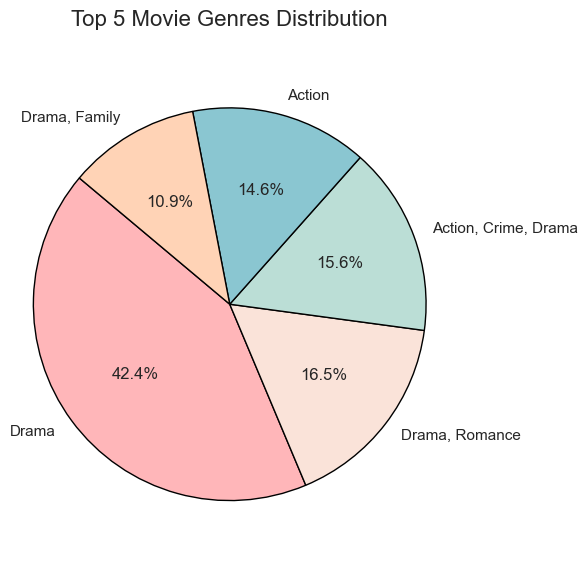

In [28]:
plt.figure(figsize=(6, 6))
colors = ['#FFB6B9', '#FAE3D9', '#BBDED6', '#8AC6D1', '#FFD3B6']  
plt.pie(
    top_genres['Count'],
    labels=top_genres['Genre'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Top 5 Movie Genres Distribution', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Top 10 Directors Ranked by Average Movie Ratings

In [29]:
director_rating_avg = (
    df.groupby('Director')['Rating']
    .mean()
    .reset_index()
    .sort_values(by='Rating', ascending=False)
)
top_directors = director_rating_avg.head(10)
top_directors

,Director,Rating
2243,Saif Ali Sayeed,10.0
2560,Sriram Raja,9.7
504,Bobby Kumar,9.6
322,Arvind Pratap,9.4
1513,Munni Pankaj,9.4
2598,Suhrud Godbole,9.4
1601,Nikhil Mahar,9.3
2809,Venkatesh Bk,9.3
1879,Rahul Mallick,9.3
1864,Raghav Jairath,9.3


C:\Users\Dell\AppData\Local\Temp\ipykernel_10324\2792742025.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


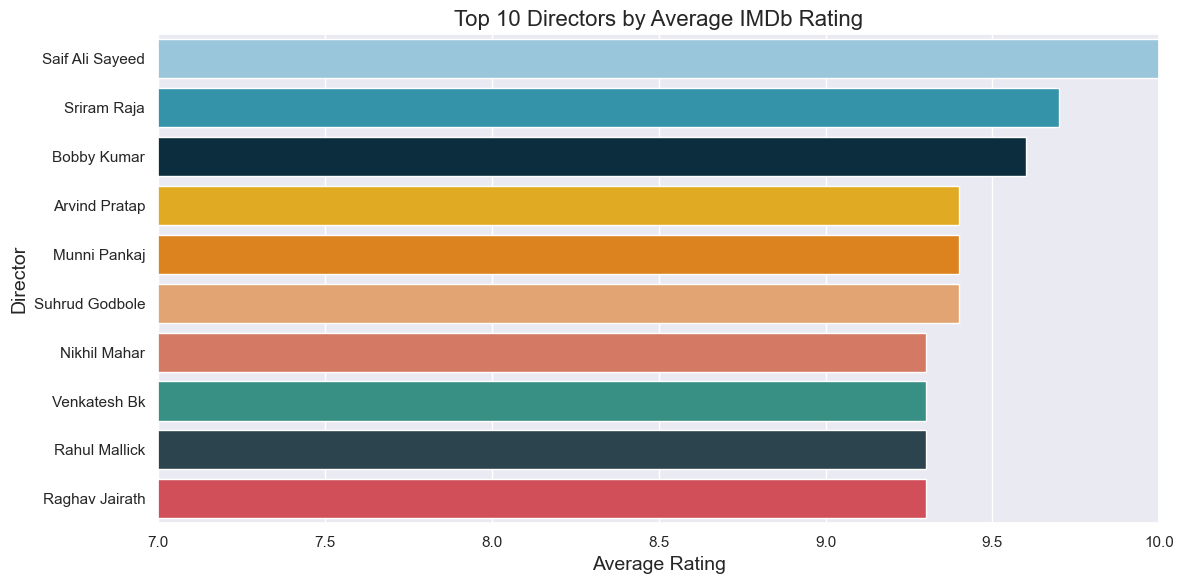

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_directors,
    x='Rating',
    y='Director',
    palette=['#8ecae6', '#219ebc', '#023047', '#ffb703', '#fb8500', '#f4a261', '#e76f51', '#2a9d8f', '#264653', '#e63946']
)

plt.title("Top 10 Directors by Average IMDb Rating", fontsize=16)
plt.xlabel("Average Rating", fontsize=14)
plt.ylabel("Director", fontsize=14)
plt.xlim(7.0, 10.0)
plt.tight_layout()
plt.show()

### Relationship between the number of votes and movie ratings

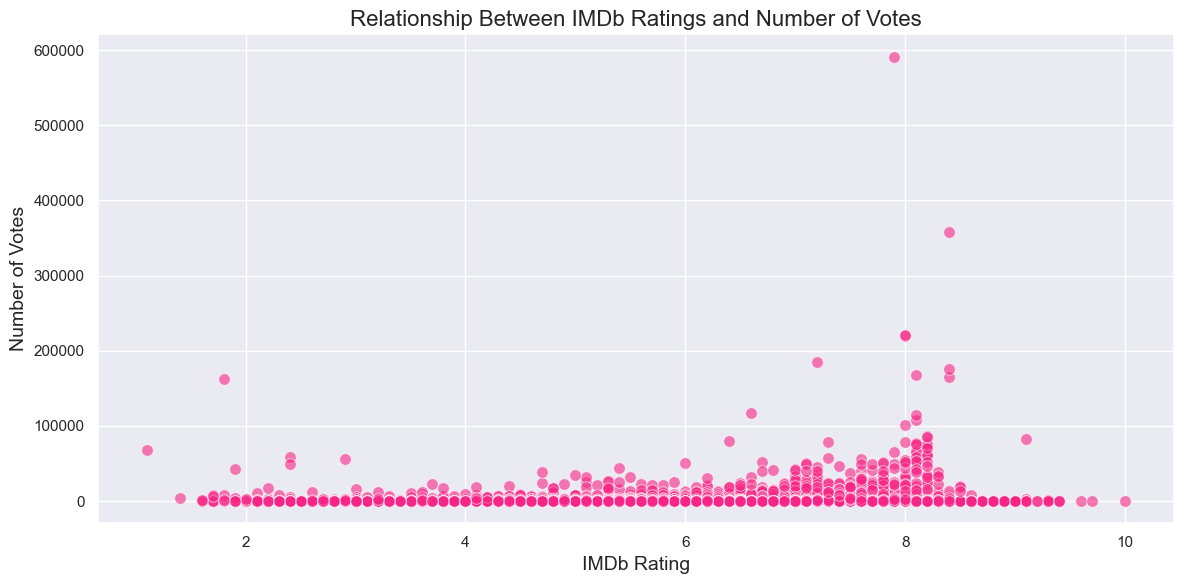

In [31]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Rating', y='Votes', color='#f72585', alpha=0.6, s=70)

plt.title('Relationship Between IMDb Ratings and Number of Votes', fontsize=16)
plt.xlabel('IMDb Rating', fontsize=14)
plt.ylabel('Number of Votes', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

### Top 10 Actors by Number of Movies

In [35]:
actor_counts = df['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']
top_actors = actor_counts.head(10)
top_actors

,Actor,MovieCount
0,Jeetendra,140
1,Dharmendra,134
2,Mithun Chakraborty,130
3,Ashok Kumar,125
4,Rajesh Khanna,118
5,Amitabh Bachchan,116
6,Dev Anand,90
7,Shashi Kapoor,88
8,Akshay Kumar,82
9,Sanjay Dutt,73


C:\Users\Dell\AppData\Local\Temp\ipykernel_10324\763517111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_actors, x='MovieCount', y='Actor', palette='Set2')
C:\Users\Dell\AppData\Local\Temp\ipykernel_10324\763517111.py:8: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


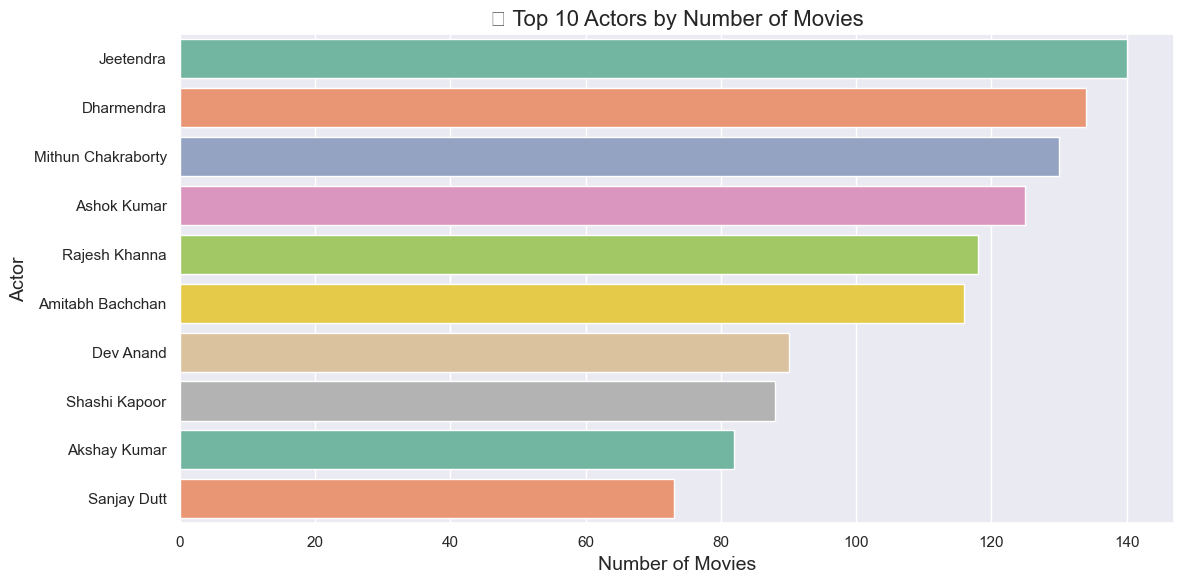

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_actors, x='MovieCount', y='Actor', palette='Set2')

plt.title('🎭 Top 10 Actors by Number of Movies', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Actor', fontsize=14)

plt.tight_layout()
plt.show()

### Display How many movies were released each year

In [39]:
yearly_movie_counts = (
    df['Year']
    .value_counts()
    .sort_index()  
    .reset_index() 
)

yearly_movie_counts.columns = ['Year', 'MovieCount']

yearly_movie_counts

,Year,MovieCount
0,1917,1
1,1931,3
2,1932,2
3,1933,4
4,1934,2
...,...,...
87,2017,223
88,2018,214
89,2019,238
90,2020,157


C:\Users\Dell\AppData\Local\Temp\ipykernel_10324\1616753433.py:18: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


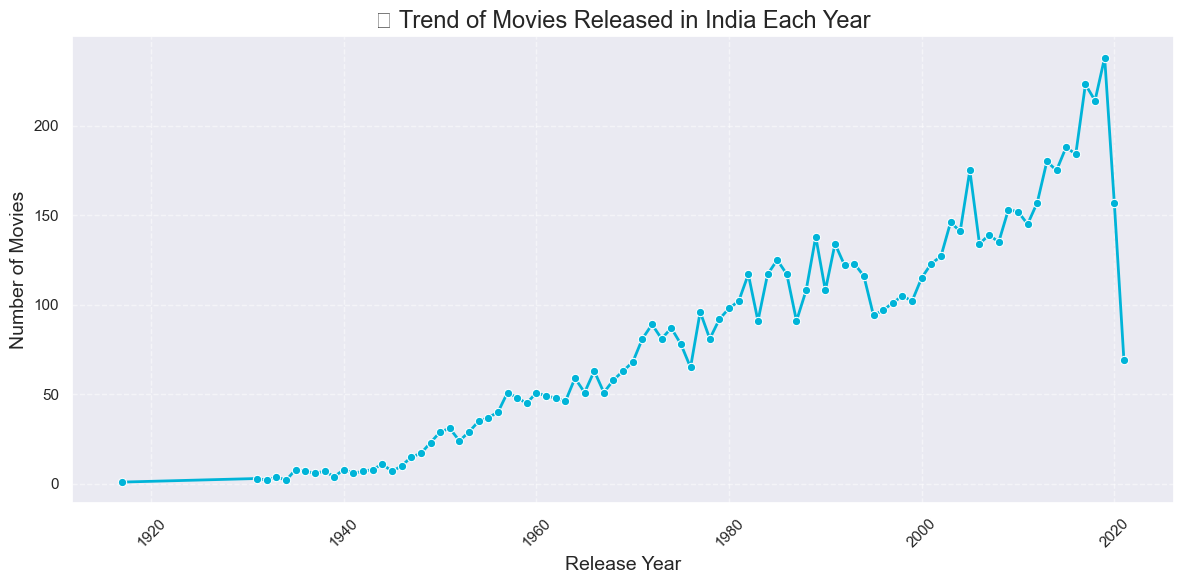

In [40]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=yearly_movie_counts,
    x='Year',
    y='MovieCount',
    marker='o',
    color='#00b4d8',   
    linewidth=2
)

plt.title('🎬 Trend of Movies Released in India Each Year', fontsize=17)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top-Rated & Most Voted Movies

In [44]:
filtered_df = df[(df['Rating'] > 8) & (df['Votes'] > 10000)]
filtered_df.head(15)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170.0,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
173,A Wednesday,2008,104.0,"Action, Crime, Drama",8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
981,Anand,1971,122.0,"Drama, Musical",8.3,31937,Hrishikesh Mukherjee,Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal
1009,Andaz Apna Apna,1994,160.0,"Action, Comedy, Romance",8.1,50810,Rajkumar Santoshi,Aamir Khan,Salman Khan,Raveena Tandon
1019,Andhadhun,2018,139.0,"Crime, Drama, Music",8.2,77901,Sriram Raghavan,Ayushmann Khurrana,Tabu,Radhika Apte
1285,Article 15,2019,130.0,"Crime, Drama, Mystery",8.2,25706,Anubhav Sinha,Ayushmann Khurrana,Nassar,Manoj Pahwa
1877,Barfi!,2012,151.0,"Comedy, Drama, Romance",8.1,77377,Anurag Basu,Ranbir Kapoor,Priyanka Chopra Jonas,Ileana D'Cruz
2065,Bhaag Milkha Bhaag,2013,186.0,"Biography, Drama, Sport",8.2,62636,Rakeysh Omprakash Mehra,Farhan Akhtar,Sonam Kapoor,Pawan Malhotra
2412,Black,2005,122.0,Drama,8.2,33782,Sanjay Leela Bhansali,Amitabh Bachchan,Rani Mukerji,Shernaz Patel
2425,Black Friday,2004,143.0,"Action, Crime, Drama",8.5,19493,Anurag Kashyap,Kay Kay Menon,Pawan Malhotra,Aditya Srivastav


C:\Users\Dell\AppData\Local\Temp\ipykernel_10324\2473093892.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right')


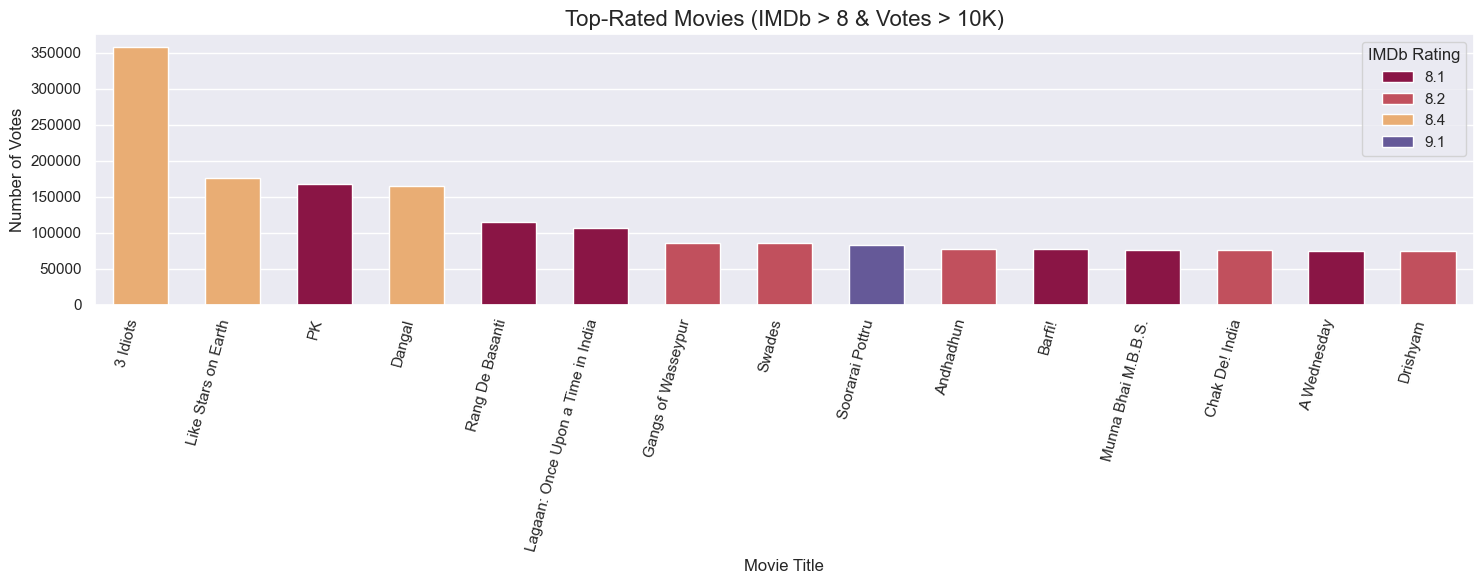

In [47]:
filtered_df_sorted = df[(df['Rating'] > 8) & (df['Votes'] > 10000)].sort_values(by='Votes', ascending=False).head(15)
plt.figure(figsize=(15, 6))
ax = sns.barplot(
    data=filtered_df_sorted,
    x='Name',
    y='Votes',
    hue='Rating',
    dodge=False,
    width=0.6,
    palette='Spectral' 
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right')
ax.set_xlabel('Movie Title', fontsize=12)
ax.set_ylabel('Number of Votes', fontsize=12)
ax.set_title('Top-Rated Movies (IMDb > 8 & Votes > 10K)', fontsize=16)
ax.legend(title='IMDb Rating', loc='upper right')

plt.tight_layout()
plt.show()

### Movie Duration Trends by Year

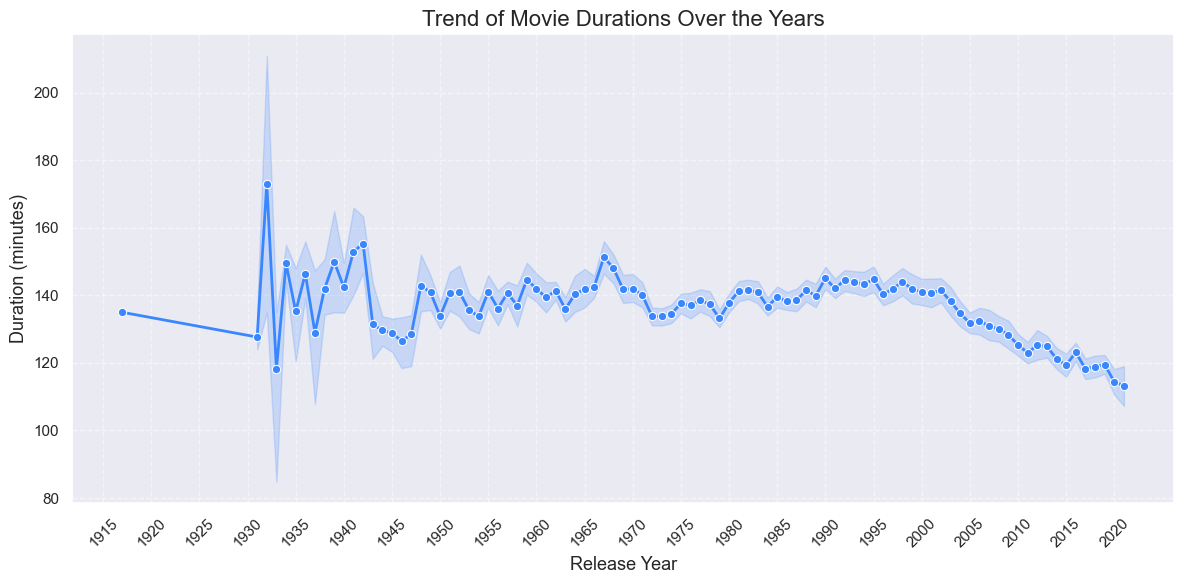

In [48]:
df['Duration'] = df['Duration'].astype(int)
df['Year'] = df['Year'].astype(int)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x='Year',
    y='Duration',
    color='#3a86ff',
    linewidth=2,
    marker='o'
)
plt.title('Trend of Movie Durations Over the Years', fontsize=16)
plt.xlabel('Release Year', fontsize=13)
plt.ylabel('Duration (minutes)', fontsize=13)
plt.xticks(np.arange(1915, 2025, 5), rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

###  Analyze multiple genres per movie

In [49]:
df['Genre'] = df['Genre'].str.split(',')
genre_df = df.explode('Genre')
genre_df['Genre'] = genre_df['Genre'].str.strip()
genre_df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Musical,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,Drama,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
6,...Yahaan,2005,142,Romance,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
6,...Yahaan,2005,142,War,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


C:\Users\Dell\AppData\Local\Temp\ipykernel_10324\3710732281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


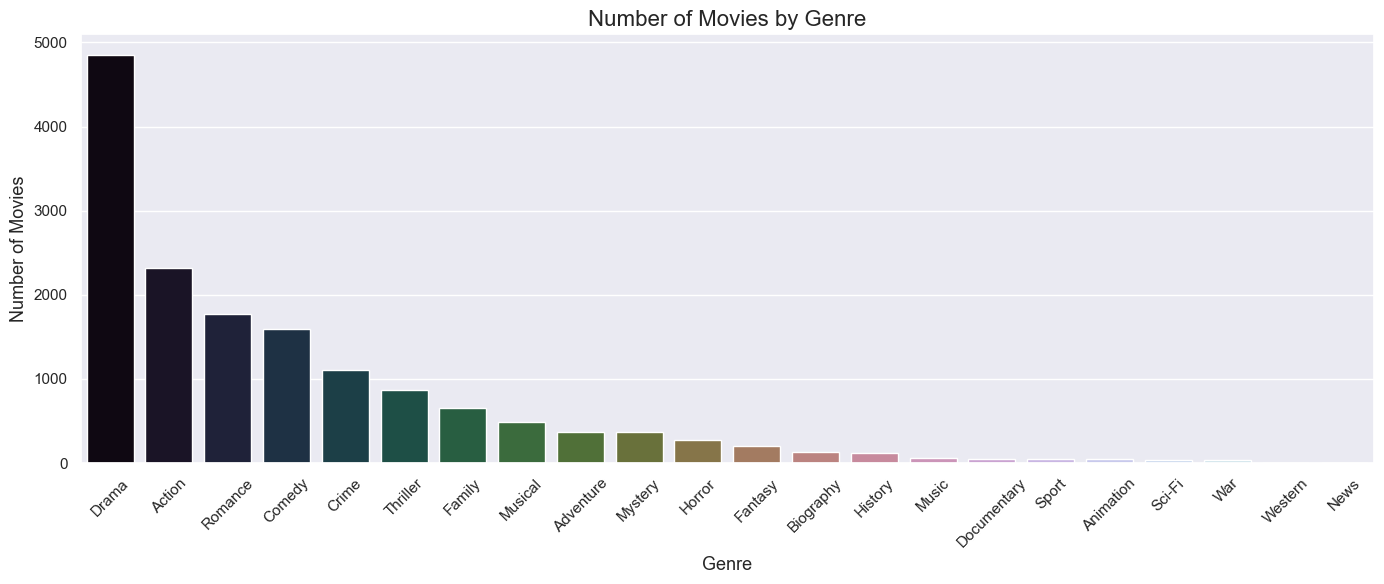

In [50]:
plt.figure(figsize=(14, 6))
sns.countplot(
    data=genre_df,
    x='Genre',
    order=genre_df['Genre'].value_counts().index,
    palette='cubehelix'
)
plt.title('Number of Movies by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=13)
plt.ylabel('Number of Movies', fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###  Average IMDb rating per genre

In [52]:
average_rating_by_genre = (
    genre_df.groupby('Genre')['Rating']
    .mean()
    .reset_index()
    .sort_values(by='Rating', ascending=False)
)
average_rating_by_genre

,Genre,Rating
15,News,8.000000
6,Documentary,7.587755
10,History,6.804167
3,Biography,6.717187
18,Sport,6.380851
8,Family,6.172657
13,Musical,6.160772
12,Music,6.082456
7,Drama,5.988834
20,War,5.981818


C:\Users\Dell\AppData\Local\Temp\ipykernel_10324\92464693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


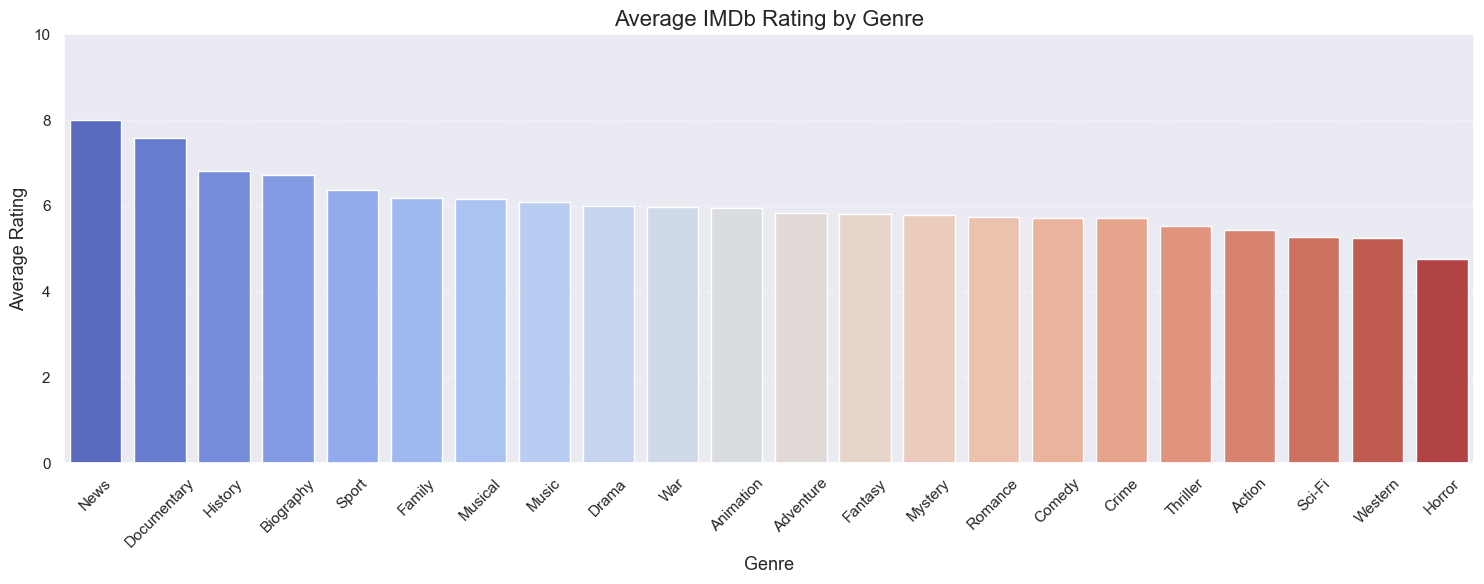

In [53]:
plt.figure(figsize=(15, 6))
sns.barplot(
    data=average_rating_by_genre,
    x='Genre',
    y='Rating',
    palette='coolwarm'
)

plt.title('Average IMDb Rating by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=13)
plt.ylabel('Average Rating', fontsize=13)
plt.xticks(rotation=45)
plt.ylim(0, 10)  # IMDb rating range
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Featured Engineering


In [55]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.drop(['Name'], axis=1).copy()

labelencoder = LabelEncoder()

df_encoded['Director'] = labelencoder.fit_transform(df['Director'].astype(str))
df_encoded['Actor 1']  = labelencoder.fit_transform(df['Actor 1'].astype(str))
df_encoded['Actor 2']  = labelencoder.fit_transform(df['Actor 2'].astype(str))
df_encoded['Actor 3']  = labelencoder.fit_transform(df['Actor 3'].astype(str))

df_encoded['Genre'] = labelencoder.fit_transform(df['Genre'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x))

df_encoded.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,252,7.0,8,755,1686,2725,373
3,2019,110,205,4.4,35,1637,1500,865,2543
5,1997,147,175,4.7,827,1881,481,84,2422
6,2005,142,315,7.4,1086,2486,878,1346,2996
8,2012,82,351,5.6,326,161,2385,1416,1189


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(scaled_array, columns=df_encoded.columns)
df_scaled.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.980769,0.293333,0.607229,0.662921,0.000005,0.255499,0.698426,0.979511,0.123102
1,0.980769,0.296667,0.493976,0.370787,0.000051,0.553976,0.621375,0.310927,0.839274
2,0.769231,0.420000,0.421687,0.404494,0.001390,0.636548,0.199254,0.030194,0.799340
3,0.846154,0.403333,0.759036,0.707865,0.001828,0.841286,0.363712,0.483825,0.988779
4,0.913462,0.203333,0.845783,0.505618,0.000543,0.054484,0.987987,0.508986,0.392409


🔗 Correlation with Rating:

Rating      1.000000
Votes       0.134655
Genre       0.122565
Actor 2     0.038852
Actor 3     0.031550
Actor 1     0.025089
Duration   -0.001801
Director   -0.003678
Year       -0.194990
Name: Rating, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_10324\4204866849.py:16: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


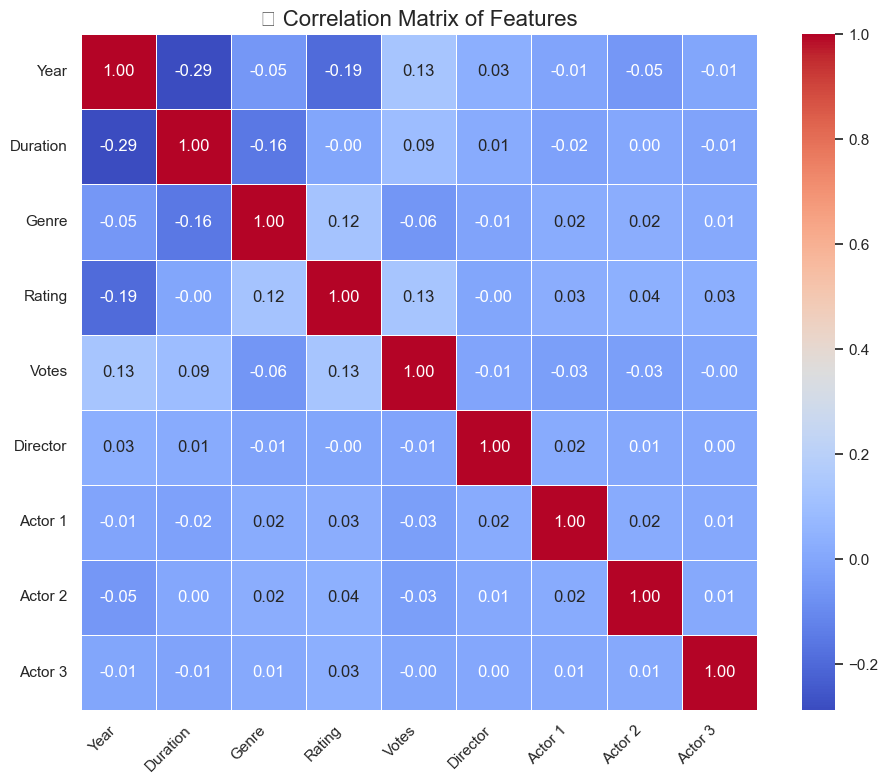

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = df_encoded.corr(numeric_only=True)

corr_with_rating = corr_df['Rating'].sort_values(ascending=False)
print("🔗 Correlation with Rating:\n")
print(corr_with_rating)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)

plt.title('🔍 Correlation Matrix of Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Model Training & Evaluation

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X = df_encoded.drop('Rating', axis=1)
y = df_encoded['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"\nEvaluation for {model_name}:")
    print("R2 Score: ", round(r2_score(y_true, y_pred), 4))
    print("Mean Squared Error: ", round(mean_squared_error(y_true, y_pred), 4))
    print("Mean Absolute Error: ", round(mean_absolute_error(y_true, y_pred), 4))

evaluate_model(y_test, lr_preds, "Linear Regression")
evaluate_model(y_test, tree_preds, "Decision Tree Regressor")


Evaluation for Linear Regression:
R2 Score:  0.0848
Mean Squared Error:  1.6973
Mean Absolute Error:  1.0286

Evaluation for Decision Tree Regressor:
R2 Score:  -0.3155
Mean Squared Error:  2.4397
Mean Absolute Error:  1.1745
